In [1]:
import geopandas as gpd
import geoplot
from glob import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
import rasterio
from rasterio.plot import show
import fiona
from descartes import PolygonPatch

In [59]:
wd = 'data/IN_expansion_area_UTM'
f = glob(f'{wd}/*.shp')[0]
df = gpd.read_file(f).to_crs(epsg=4326)
wd = 'data/RioMoraNWRBndry_2019'
f = glob(f'{wd}/*.shp')[0]
rio = gpd.read_file(f).to_crs(epsg=4326)


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [6]:
# look at the WDPA-data to compare.
wdpa_file = glob(f'data/WDPAshp/*.shp')[0]
print(wdpa_file)
wdpa = gpd.read_file(wdpa_file).to_crs(epsg=4326)

data/WDPAshp/WDPA_Nov2019-shapefile-polygons.shp


/usr/local/lib/python3.6/dist-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [54]:
import os
subset_name = 'filtered'
outfile = f'{os.path.splitext(wdpa_file)[0]}-{subset_name}{os.path.splitext(wdpa_file)[1]}'
print(outfile)
subset = wdpa[(wdpa['NAME']=='Ikh nart') |\
              (wdpa['NAME']=='Rio Mora National Wildlife Refu')]
subset.to_file(wdpa_file)

data/WDPAshp/WDPA_Nov2019-shapefile-polygons-filtered.shp


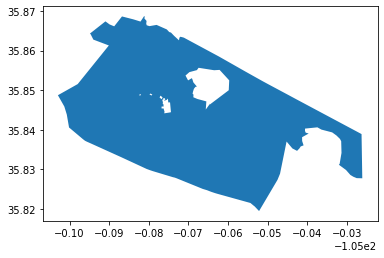

In [57]:
subset[subset.NAME=='Rio Mora National Wildlife Refu'].plot()

In [41]:
ikhnart = df[df.ENG_NAME=='Ikh nart']
clat = float(ikhnart.geometry.centroid.y)
clon = float(ikhnart.geometry.centroid.x)

In [52]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
mongolia = gpd.read_file('data/mongolia/mongolia69.shp')
dem = rasterio.open('data/geotiff/srtm-dem.tif')

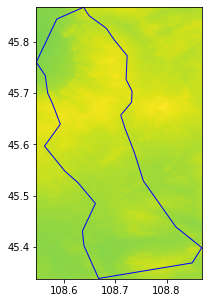

In [162]:
f, ax = plt.subplots(1,1,figsize=(8,5))
ikhnart.plot(ax =ax, facecolor='none', edgecolor='blue')
show(dem, ax=ax)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  


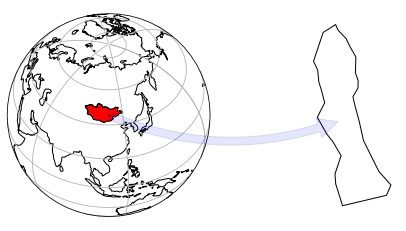

In [172]:
fig, axarr = plt.subplots(1,2, figsize=(8,4),\
                        subplot_kw={'projection':\
                                    geoplot.crs.Orthographic(central_latitude=clat,\
                                              central_longitude=clon)})
geoplot.polyplot(mongolia, facecolor='red', ax=axarr[0])
geoplot.polyplot(ikhnart, facecolor='yellow', ax=axarr[0])
geoplot.polyplot(ikhnart, ax=axarr[1], \
                 facecolor='none', \
                 edgecolor='black')

#show(dem.read(), ax = axarr[1])

axarr[0].set_global()
axarr[0].outline_patch.set_visible(True)
axarr[0].coastlines()
axarr[0].gridlines()

ax0tr = axarr[0].transData # Axis 0 -> Display
ax1tr = axarr[1].transData # Axis 1 -> Display
figtr = fig.transFigure.inverted() # Display -> Figure
# 2. Transform arrow start point from axis 0 to figure coordinates
ptB = figtr.transform(ax0tr.transform((225., -10.)))
# 3. Transform arrow end point from axis 1 to figure coordinates
ptE = figtr.transform(ax1tr.transform((225., 1.)))
# 4. Create the patch
arrow = mpl.patches.FancyArrowPatch(
    # Place arrow in figure coord system
    ptB, ptE, transform=fig.transFigure, \
    fc = "blue", connectionstyle="arc3,rad=0.2", \
    arrowstyle='simple', \
    alpha = 0.1,\
    mutation_scale = 40.
)
# 5. Add patch to list of objects to draw onto the figure
fig.patches.append(arrow)
fig.savefig('figs/iknart_map.png', dpi=200, bbox_inches='tight')
